In [1]:
import cv2
import numpy as np 
import math
import random
import matplotlib.pyplot as plt
from skimage.io import imread
from PIL import Image
import time
import glob

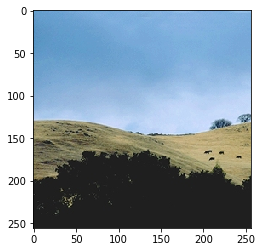

In [11]:
sky_img = cv2.imread("sky/sky_train.jpg")
sky_img = cv2.cvtColor(sky_img, cv2.COLOR_BGR2RGB)
plt.imshow(sky_img)

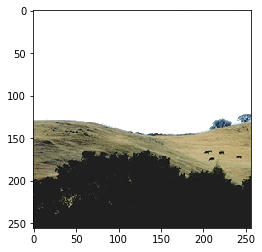

In [12]:
non_sky_img = cv2.imread("sky/no_sky_train.jpg")
non_sky_img = cv2.cvtColor(non_sky_img, cv2.COLOR_BGR2RGB)
plt.imshow(non_sky_img)

In [13]:
def Cal_Dist(r1, g1, b1, r2, g2, b2):
    r = pow((float(r1)-float(r2)),2)
    g = pow((float(g1)-float(g2)),2)
    b = pow((float(b1)-float(b2)),2)
    dist = math.sqrt(r + g + b)
    return dist

In [14]:
def K_means(data_pt, k):
    ctr = []
    while len(ctr) < k:        
        x = random.randint(0, len(data_pt) - 1)
#Adding pixel data value to the list whos points are not in ctr
        if [data_pt[x][0], data_pt[x][1], data_pt[x][2]] not in ctr:
            ctr.append([data_pt[x][0], data_pt[x][1], data_pt[x][2]])
#Flag to indicate cluster  conversion       
    Flag = False
    while(Flag == False):
        clusters = []

        for i in range(k):
            clusters.append([])
            
            
#initial distance btw data points and center are infinity
        for i in range(len(data_pt)):
            dist = math.inf
#index to know which data points belongs to which cluster
            index = 0

#Checking the distance between data points and center
            for x in range(len(clusters)):
                center = ctr[x]
                centerR, centerG, centerB = center[0], center[1], center[2]
                
#Getting the individual colors values for the pixel. OpenCV stores images as BGR by default
                dataR, dataG, dataB = data_pt[i][0], data_pt[i][1], data_pt[i][2]
                updated_dist = Cal_Dist(centerR, centerG, centerB, dataR, dataG, dataB)

                if updated_dist < dist:
                    dist = updated_dist
                    index = x

#Adding the datapoints to the cluster which are closer to respective cluster
            clusters[index].append([data_pt[i][0], data_pt[i][1], data_pt[i][2]])

#updating new cluster ctr
        for i in range(len(clusters)):
            cluster = clusters[i]
            if len(cluster) == 0:
                continue
            avgR, avgG, avgB = 0, 0, 0

#Finding the average of RGB points in the cluster
            for j in range(len(cluster)):
                avgR += cluster[j][0]
                avgG += cluster[j][1]
                avgB += cluster[j][2]

            avgR = int(avgR/len(cluster))
            avgG = int(avgG/len(cluster))
            avgB = int(avgB/len(cluster))

#updating ctr value if change else converged
            if avgR != ctr[i][0] or avgG != ctr[i][1] or avgB != ctr[i][2]:
                ctr[i][0] = avgR
                ctr[i][1] = avgG
                ctr[i][2] = avgB
            else:
                Flag = True


    return ctr

In [15]:
mask = non_sky_img[0][0]
non_sky_img_row, non_sky_img_col = non_sky_img.shape[0], non_sky_img.shape[1]

sky_cluster = []
non_sky_cluster = []

#making 2 cluster as sky and non sky by checking if the color matches the mask color
for i in range(non_sky_img_row):
    for j in range(non_sky_img_col):
        if non_sky_img[i][j][0] == mask[0] and non_sky_img[i][j][1] == mask[1] and non_sky_img[i][j][2] == mask[2]:
            r = sky_img[i][j][2]
            g = sky_img[i][j][1]
            b = sky_img[i][j][0]
            sky_cluster.append([r, g, b])       
        else:
            r = sky_img[i][j][2]
            g = sky_img[i][j][1]
            b = sky_img[i][j][0]
            non_sky_cluster.append([r, g, b])
                
non_sky_ctr = K_means(non_sky_cluster, 10)
sky_ctr = K_means(sky_cluster, 10)

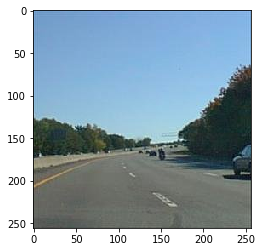

In [7]:
test_img = cv2.imread("sky/sky_test1.jpg")
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.imshow(test_img)

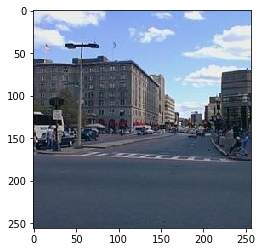

In [29]:
test_img = cv2.imread("sky/sky_test2.jpg")
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.imshow(test_img)

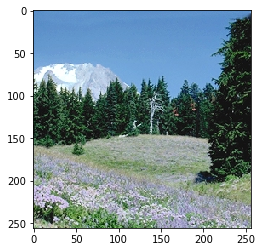

In [32]:
test_img = cv2.imread("sky/sky_test3.jpg")
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.imshow(test_img)

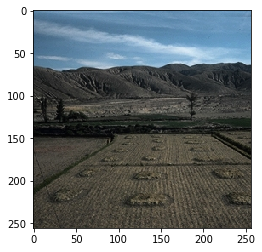

In [20]:
test_img = cv2.imread("sky/sky_test4.jpg")
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.imshow(test_img)

In [21]:
test_img_row, test_img_col = test_img.shape[0], test_img.shape[1]
output_img = test_img.copy()
#initializing dist to be infinity, and checking the closter data point to sky and non sky centers
for i in range(test_img_row):
    for j in range(test_img_col):
        data_pt = test_img[i][j]
        r, g, b = data_pt[2], data_pt[1], data_pt[0]
        dist = math.inf

        for k in range(len(non_sky_ctr)):       
            centerR, centerG, centerB = non_sky_ctr[k][0], non_sky_ctr[k][1], non_sky_ctr[k][2]   
            updated_dist = Cal_Dist(r, g, b, centerR, centerG, centerB)
            if updated_dist < dist:
                dist = updated_dist
                        
        for k in range(len(sky_ctr)):
            centerR, centerG, centerB = sky_ctr[k][0], sky_ctr[k][1], sky_ctr[k][2]
            updated_dist = Cal_Dist(r, g, b, centerR, centerG, centerB)
            if updated_dist < dist:
                output_img[i][j] = [0, 0, 255]
                break

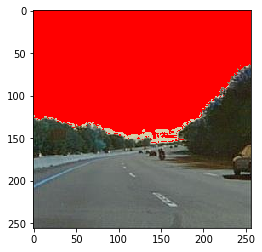

In [28]:
output_test1 = cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB)
plt.imshow(output_test1)

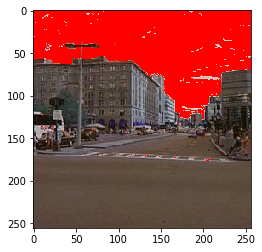

In [31]:
output_test2 = cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB)
plt.imshow(output_test2)

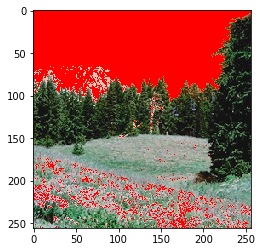

In [34]:
output_test3 = cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB)
plt.imshow(output_test3)

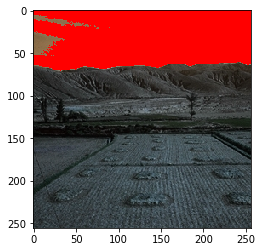

In [22]:
output_test4 = cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB)
plt.imshow(output_test4)